<a href="https://colab.research.google.com/github/marianatimbo/customer-churn-supervised/blob/main/Projeto_U2_AMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import gdown
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

In [2]:
url = 'https://drive.google.com/file/d/11LEG3Hgsz5-lrIUrWei1wsTcQF54BJPc/view'
output = 'Telco-Customer.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=11LEG3Hgsz5-lrIUrWei1wsTcQF54BJPc
To: /content/Telco-Customer.csv
100%|██████████| 978k/978k [00:00<00:00, 18.6MB/s]


'Telco-Customer.csv'

In [3]:
data = pd.read_csv('Telco-Customer.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#PRÉ-PROCESSAMENTO:


##Ajuste no "type" das colunas

In [6]:
data.duplicated().any()

np.False_

In [7]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
#Converter coluna para float e ver quantos números não puderam ser convertidos.
pd.to_numeric(data['TotalCharges'], errors='coerce').isna().sum()

np.int64(11)

In [9]:
#Ver quais valores deram erro.
data[pd.to_numeric(data['TotalCharges'], errors='coerce').isna()][['TotalCharges']]


,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


In [10]:
#Converter para float.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


##Eliminar dados faltantes:


In [12]:
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


 Como a quantidade de dados faltantes é muito pequena em relação ao total do conjunto de dados, optamos por removê-las.

In [13]:
data.dropna(axis=0, inplace=True)
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##Modificação nas colunas categóricas para int(binário)

In [14]:
#note as variaveis únicas de cada coluna e perceba os padrões:
#tentar fazer um gráfico bonito
for col in data.columns:
  print(f'{col}: {data[col].value_counts()}\n')

customerID: customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
             ..
8091-TTVAX    1
7469-LKBCI    1
9763-GRSKD    1
6388-TABGU    1
7892-POOKP    1
Name: count, Length: 7032, dtype: int64

gender: gender
Male      3549
Female    3483
Name: count, dtype: int64

SeniorCitizen: SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

Partner: Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents: Dependents
No     4933
Yes    2099
Name: count, dtype: int64

tenure: tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

PhoneService: PhoneService
Yes    6352
No      680
Name: count, dtype: int64

MultipleLines: MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

InternetService: InternetService
Fiber optic    3096
DSL            2416
No             1520
Name

Percebemos acima que há uma repetição da variavel categórica "*No Internet Service*"  e com a mesma quantidade de valores (1520) nas colunas 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'.

Concluimos com isso que esses atributos avaliam determinada caracteristica com base na condição do cliente possuir serviço de internet.

Co isso, decidimos tratar o valor "No internet service" como equivalente a "No", pois ambas as situações indicam a ausência da funcionalidade.

Percebe-se também que ao excluir o valor "*No Internet Service*" das respectivas colunas, teremos apenas os valores únicos "Yes" e "No", podendo ser eles tranformados para binários(1 e 0).

Transformar esses valores em binário nos facilitará o treinamento em modelos de aprendizados de máquina que tem dificuldades em trabalhar com tipos catégoricos. Com isso vamos fazer essa transformação abaixo:

In [15]:
#criar uma coluna "HasInternetService" e substituitir valores nas colunas que possuem "No Internet Service" por "No"
data['HasInternetService'] = data['InternetService'].apply(lambda x: 'No' if x == 'No' else 'Yes')
data['HasInternetService'].value_counts()

,count
HasInternetService,
Yes,5512
No,1520


In [16]:
#colocar "No" nas linhas que possuirem "No Internet Service":
relation_internet_service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in relation_internet_service:
  data[col] = data[col].apply(lambda x: 'No' if x == 'No internet service' else x)
  print(data[col].value_counts())

OnlineSecurity
No     5017
Yes    2015
Name: count, dtype: int64
OnlineBackup
No     4607
Yes    2425
Name: count, dtype: int64
DeviceProtection
No     4614
Yes    2418
Name: count, dtype: int64
TechSupport
No     4992
Yes    2040
Name: count, dtype: int64
StreamingTV
No     4329
Yes    2703
Name: count, dtype: int64
StreamingMovies
No     4301
Yes    2731
Name: count, dtype: int64


In [17]:
#fazer o mesmo com a coluna "PhoneService" e suas relacionadas:
data['MultipleLines'] = data['MultipleLines'].apply(lambda x: 'No' if x == 'No phone service' else x)
data['MultipleLines'].value_counts()

,count
MultipleLines,
No,4065
Yes,2967


In [18]:
#resultado após modificações:
for col in data.columns:
  print(f'{col}: {data[col].value_counts()}\n')

customerID: customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
             ..
8091-TTVAX    1
7469-LKBCI    1
9763-GRSKD    1
6388-TABGU    1
7892-POOKP    1
Name: count, Length: 7032, dtype: int64

gender: gender
Male      3549
Female    3483
Name: count, dtype: int64

SeniorCitizen: SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

Partner: Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents: Dependents
No     4933
Yes    2099
Name: count, dtype: int64

tenure: tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

PhoneService: PhoneService
Yes    6352
No      680
Name: count, dtype: int64

MultipleLines: MultipleLines
No     4065
Yes    2967
Name: count, dtype: int64

InternetService: InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

OnlineSecurity: OnlineSecuri

In [19]:
#transformando para binário:
columns_yes_no = []
for col in data.columns:
  value_unique = set(data[col].dropna().unique())
  if value_unique <= {'Yes', 'No'}:
    columns_yes_no.append(col)

data[columns_yes_no] = data[columns_yes_no].replace({'Yes': 1, 'No': 0})
data.head()

<ipython-input-19-3592549992>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_yes_no] = data[columns_yes_no].replace({'Yes': 1, 'No': 0})


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternetService
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


Vamos agora transformar o "Gender" para binario, pois seus valores categóricos são apenas 'Male' e 'Female'.

In [20]:
#o mesmo para "gender" que possuia outras categorias:
data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1})
data.head()

<ipython-input-20-2638545769>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1})


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternetService
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


In [21]:
#Tipos alterados com sucesso:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7032 non-null   object 
 1   gender              7032 non-null   int64  
 2   SeniorCitizen       7032 non-null   int64  
 3   Partner             7032 non-null   int64  
 4   Dependents          7032 non-null   int64  
 5   tenure              7032 non-null   int64  
 6   PhoneService        7032 non-null   int64  
 7   MultipleLines       7032 non-null   int64  
 8   InternetService     7032 non-null   object 
 9   OnlineSecurity      7032 non-null   int64  
 10  OnlineBackup        7032 non-null   int64  
 11  DeviceProtection    7032 non-null   int64  
 12  TechSupport         7032 non-null   int64  
 13  StreamingTV         7032 non-null   int64  
 14  StreamingMovies     7032 non-null   int64  
 15  Contract            7032 non-null   object 
 16  PaperlessBi

###Observação de possivel overffiting:

Acima foi criada uma nova coluna chamada 'HasInternetService' para indicar se o cliente possui serviço de internet ou não, porém percebi que isso poderia gerar um possível overfitting.

Isso porque nas colunas relacionadas a ter serviço de internet, todas essas colunas serão automaticamente 'No' quando o cliente não possuir o serviço de internet e sua respectiva caracteristica. Ou seja, ao adicionar mais uma coluna, enfatizando que ele não tem serviço de internet, ficará redundante e estaríamos apenas reforçando um padrão que o modelo já consegue inferir.

Portanto, decidi removê-la para evitar a redundancia e possiveis overffiting por variáveis altamente correlacionadas.

In [22]:
data = data.drop('HasInternetService', axis=1)

##One-hot-encoding

Para tratar os atributos categóricos restantes, vamos aplicar a tecnica de one-hot encoding usando métodos do pandas.

Vamos ultilizar essa tecnica pois as colunas categóricas possuem em média, apenas 3 valores únicos, então não impactará em um problema de grande dimensionalidade (Maldução da dimensionalidade) pois será um aumento controlado e razoável.


In [23]:
cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
data = pd.get_dummies(data, columns=cat_cols)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False


Eliminando colunas que serão redundantes:

In [24]:
data.drop('InternetService_No', axis=1, inplace=True)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,0,True,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,0,True,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,1,True,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,0,True,False,False,True,False,True,False,False,False
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,1,False,True,True,False,False,False,False,True,False


In [25]:
data.info()
#perceba que os tipos são "bool", vamos modificar isso no próximo trecho:

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   int64  
 6   PhoneService                             7032 non-null   int64  
 7   MultipleLines                            7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 non-nul

In [26]:
bool_cols = data.select_dtypes('bool').columns
data[bool_cols] = data[bool_cols].astype(int)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,1,1,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,1,0,1,1,0,0,0,0,1,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   int64  
 6   PhoneService                             7032 non-null   int64  
 7   MultipleLines                            7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 non-nul

##Modificação de colunas para futura aplicação de aprendizado de máquina:

In [28]:
# ajustar o index para customer id, pois esse atributo não é uma caracteristica para o modelo aprender:
data.set_index('customerID', inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
5575-GNVDE,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3668-QPYBK,0,0,0,0,2,1,0,1,1,0,...,1,1,0,1,0,0,0,0,0,1
7795-CFOCW,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
9237-HQITU,1,0,0,0,2,1,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0


In [29]:
#colocar as colunas "MonthlyCharges" e "TotalCharges" após o tipo de pagamento:
colMonthlyCharges = data['MonthlyCharges']
colTotalCharges = data['TotalCharges']
data.drop(['MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)
data.insert(len(data.columns), 'MonthlyCharges', colMonthlyCharges)
data.insert(len(data.columns), 'TotalCharges', colTotalCharges)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,29.85,29.85
5575-GNVDE,0,0,0,0,34,1,0,1,0,1,...,0,0,1,0,0,0,0,1,56.95,1889.50
3668-QPYBK,0,0,0,0,2,1,0,1,1,0,...,0,1,0,0,0,0,0,1,53.85,108.15
7795-CFOCW,0,0,0,0,45,0,0,1,0,1,...,0,0,1,0,1,0,0,0,42.30,1840.75
9237-HQITU,1,0,0,0,2,1,0,0,0,0,...,1,1,0,0,0,0,1,0,70.70,151.65


In [30]:
#colocar o coluna de label para o final:
colChurn = data['Churn']
data.drop('Churn', axis=1, inplace=True)
data.insert(len(data.columns), 'Churn', colChurn)
data.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,29.85,29.85,0
5575-GNVDE,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,56.95,1889.50,0
3668-QPYBK,0,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,53.85,108.15,1
7795-CFOCW,0,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,0,42.30,1840.75,0
9237-HQITU,1,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,70.70,151.65,1
9305-CDSKC,1,0,0,0,8,1,1,0,0,1,...,1,0,0,0,0,1,0,99.65,820.50,1
1452-KIOVK,0,0,0,1,22,1,1,0,1,0,...,1,0,0,0,1,0,0,89.10,1949.40,0
6713-OKOMC,1,0,0,0,10,0,0,1,0,0,...,1,0,0,0,0,0,1,29.75,301.90,0
7892-POOKP,1,0,1,0,28,1,1,0,0,1,...,1,0,0,0,0,1,0,104.80,3046.05,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                           

##Análise do banco de dados:

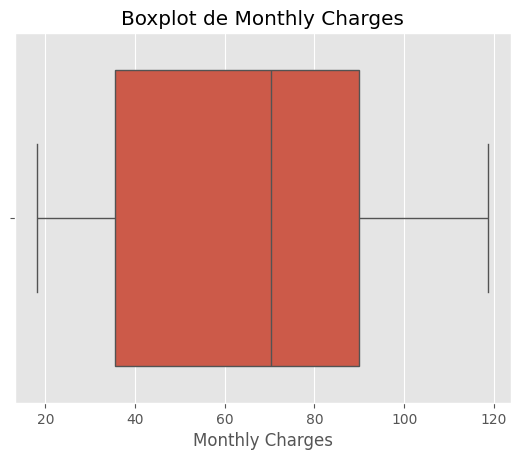

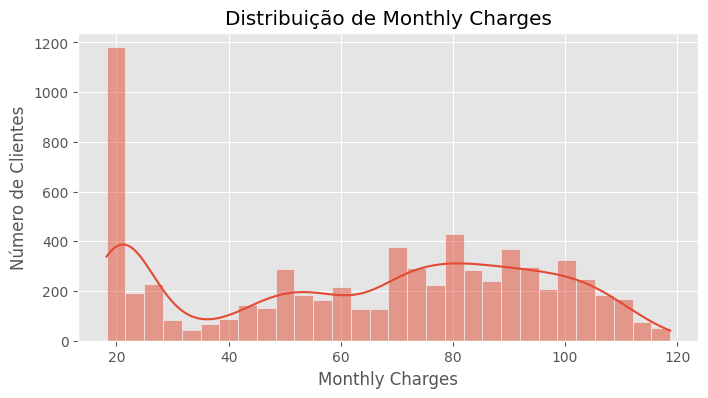

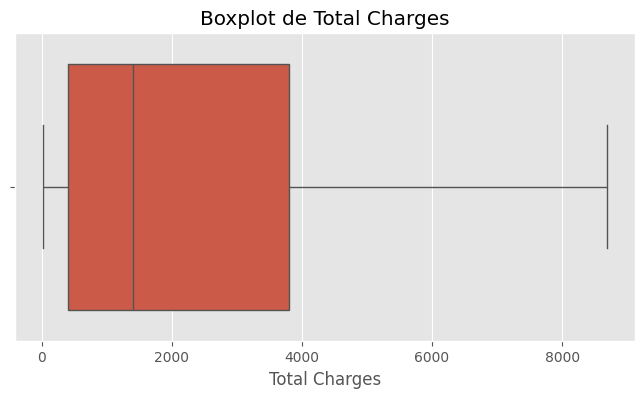

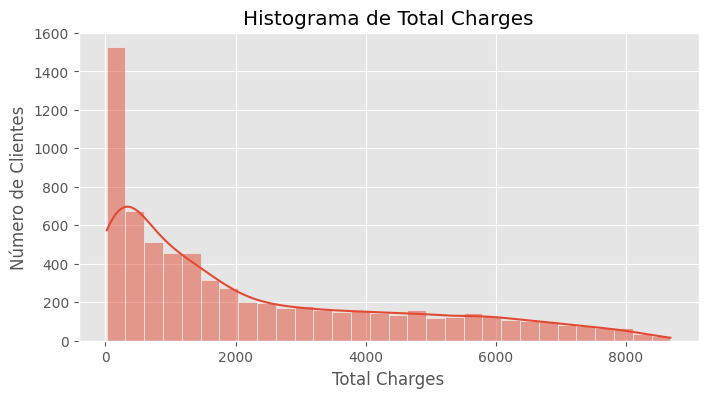

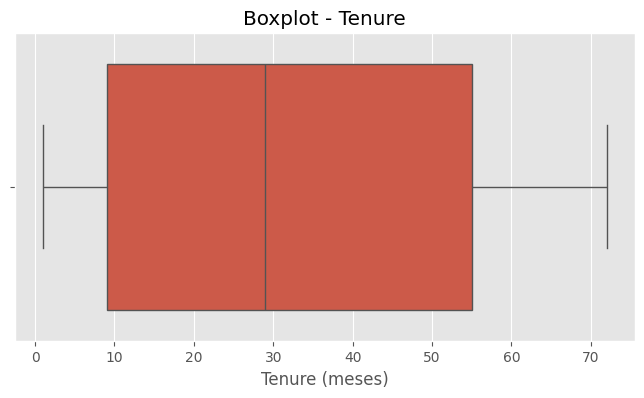

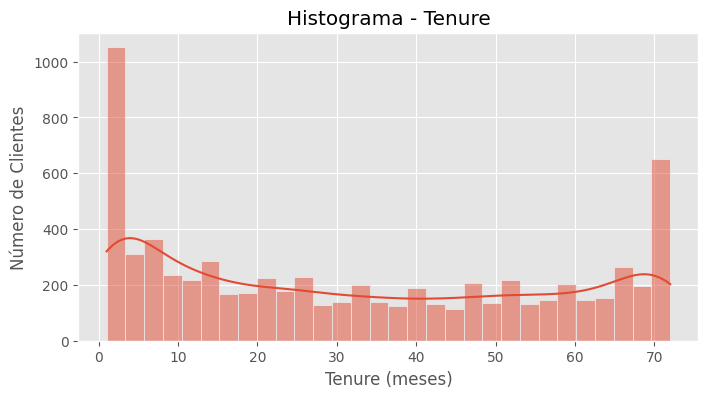

In [32]:
#Colunas com valores numéricos: tenure, monthly charges, total charges.

#Boxplot Monthly Charges
sns.boxplot(x=data['MonthlyCharges'])
plt.title('Boxplot de Monthly Charges')
plt.xlabel('Monthly Charges')
plt.show()

#Histograma Monthly Charges com curva de densidade
plt.figure(figsize=(8, 4))
sns.histplot(data['MonthlyCharges'], kde=True, bins=30)
plt.title('Distribuição de Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Número de Clientes')
plt.show()

#Boxplot Total Charges
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['TotalCharges'])
plt.title('Boxplot de Total Charges')
plt.xlabel('Total Charges')
plt.show()

#Histograma Total Charges
plt.figure(figsize=(8, 4))
sns.histplot(data['TotalCharges'], bins=30, kde=True)
plt.title('Histograma de Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Número de Clientes')
plt.show()

#Boxplot Tenure
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['tenure'])
plt.title('Boxplot - Tenure')
plt.xlabel('Tenure (meses)')
plt.show()

#Histograma Tenure
plt.figure(figsize=(8, 4))
sns.histplot(data['tenure'], bins=30, kde=True)
plt.title('Histograma - Tenure')
plt.xlabel('Tenure (meses)')
plt.ylabel('Número de Clientes')
plt.show()


Análise univariada para: gender
Frequência absoluta:
gender
0    3549
1    3483
Name: count, dtype: int64
Frequência relativa (%):
gender
0    50.47
1    49.53
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])
<ipython-input-33-1365640368>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Homem', 'Mulher'])


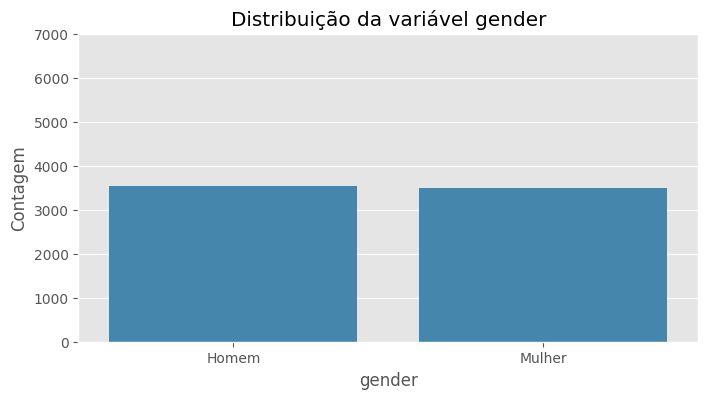


Análise univariada para: SeniorCitizen
Frequência absoluta:
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
Frequência relativa (%):
SeniorCitizen
0    83.76
1    16.24
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


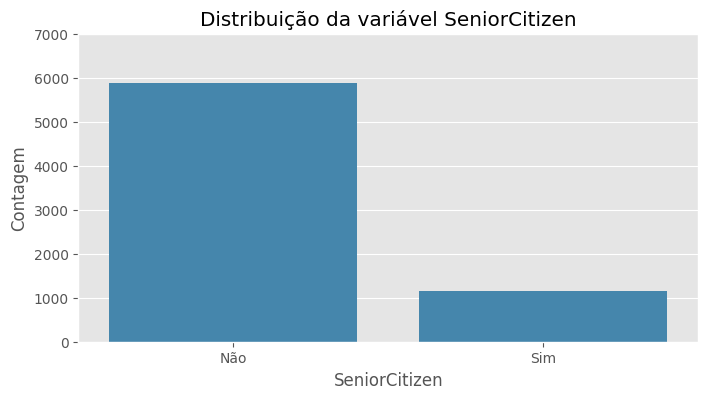


Análise univariada para: Partner
Frequência absoluta:
Partner
0    3639
1    3393
Name: count, dtype: int64
Frequência relativa (%):
Partner
0    51.75
1    48.25
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


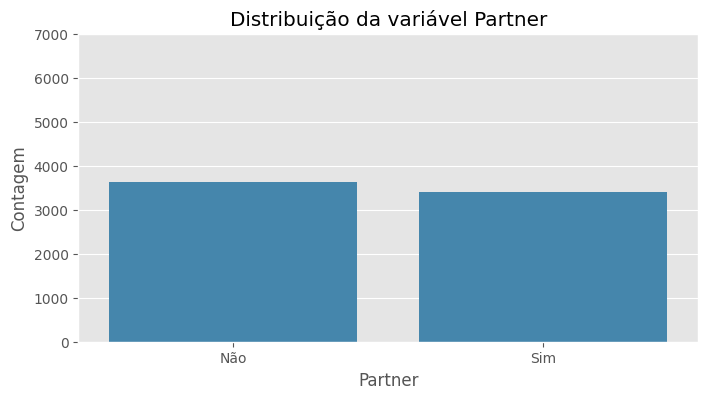


Análise univariada para: Dependents
Frequência absoluta:
Dependents
0    4933
1    2099
Name: count, dtype: int64
Frequência relativa (%):
Dependents
0    70.15
1    29.85
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


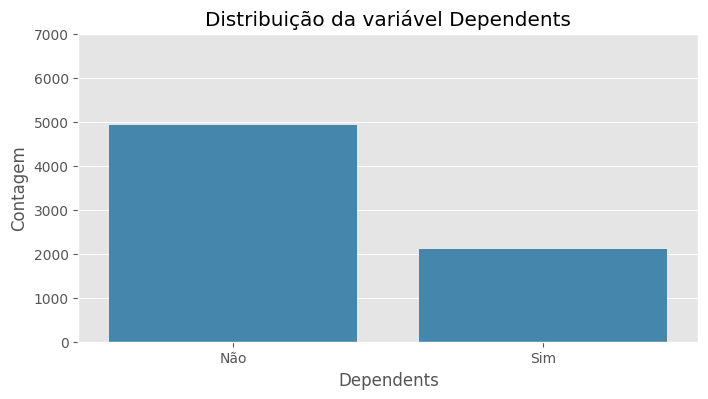


Análise univariada para: PhoneService
Frequência absoluta:
PhoneService
1    6352
0     680
Name: count, dtype: int64
Frequência relativa (%):
PhoneService
1    90.33
0     9.67
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


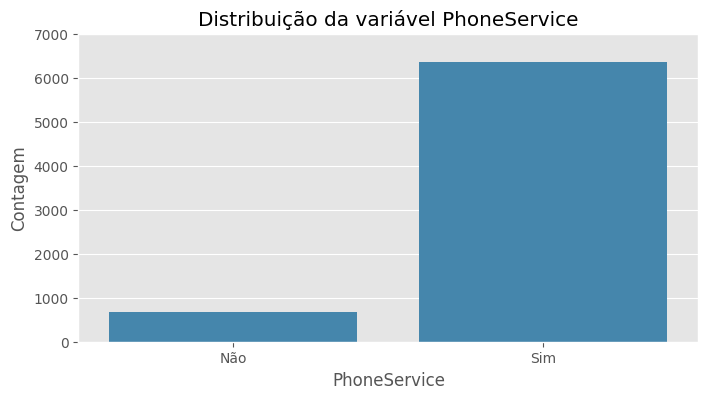


Análise univariada para: MultipleLines
Frequência absoluta:
MultipleLines
0    4065
1    2967
Name: count, dtype: int64
Frequência relativa (%):
MultipleLines
0    57.81
1    42.19
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


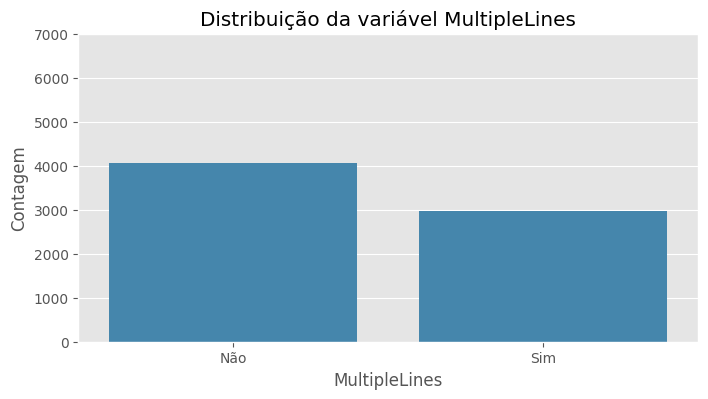


Análise univariada para: OnlineSecurity
Frequência absoluta:
OnlineSecurity
0    5017
1    2015
Name: count, dtype: int64
Frequência relativa (%):
OnlineSecurity
0    71.35
1    28.65
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


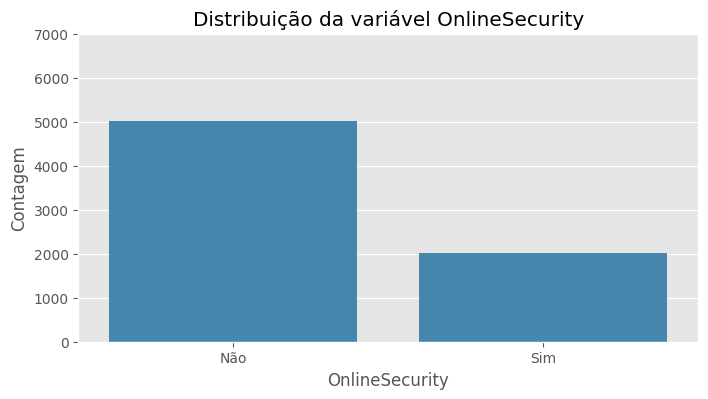


Análise univariada para: OnlineBackup
Frequência absoluta:
OnlineBackup
0    4607
1    2425
Name: count, dtype: int64
Frequência relativa (%):
OnlineBackup
0    65.51
1    34.49
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


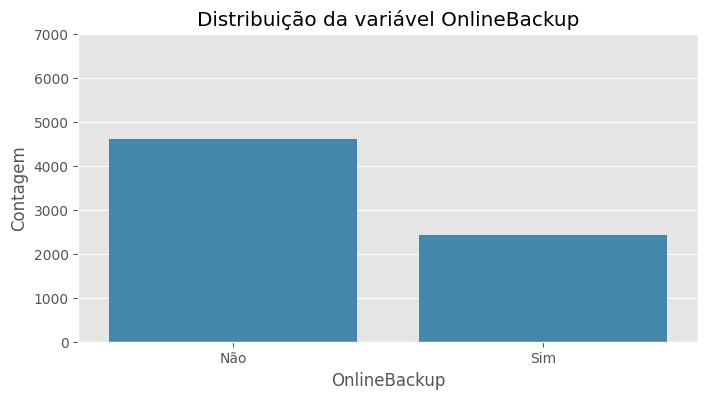


Análise univariada para: DeviceProtection
Frequência absoluta:
DeviceProtection
0    4614
1    2418
Name: count, dtype: int64
Frequência relativa (%):
DeviceProtection
0    65.61
1    34.39
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


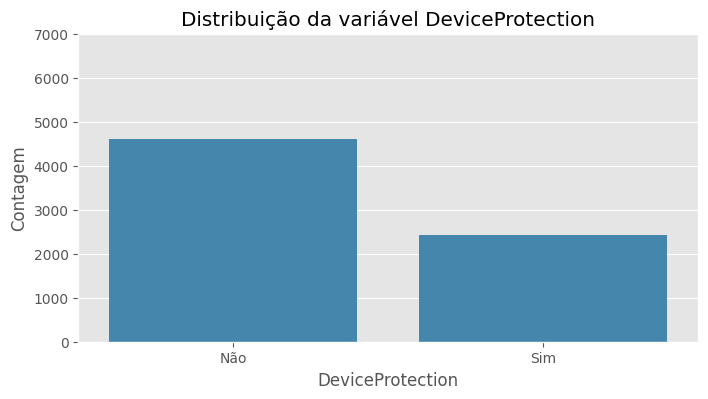


Análise univariada para: TechSupport
Frequência absoluta:
TechSupport
0    4992
1    2040
Name: count, dtype: int64
Frequência relativa (%):
TechSupport
0    70.99
1    29.01
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


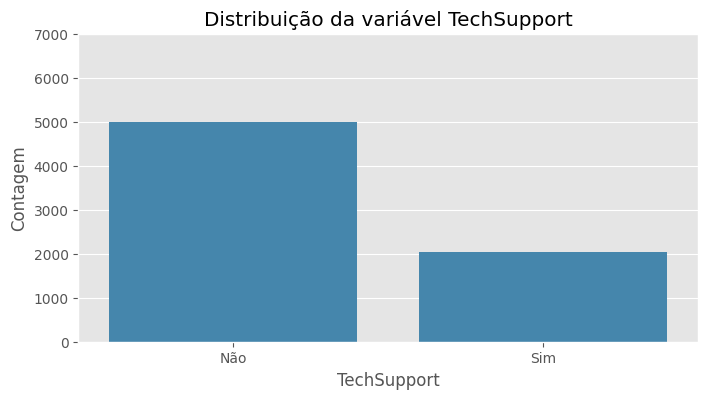


Análise univariada para: StreamingTV
Frequência absoluta:
StreamingTV
0    4329
1    2703
Name: count, dtype: int64
Frequência relativa (%):
StreamingTV
0    61.56
1    38.44
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


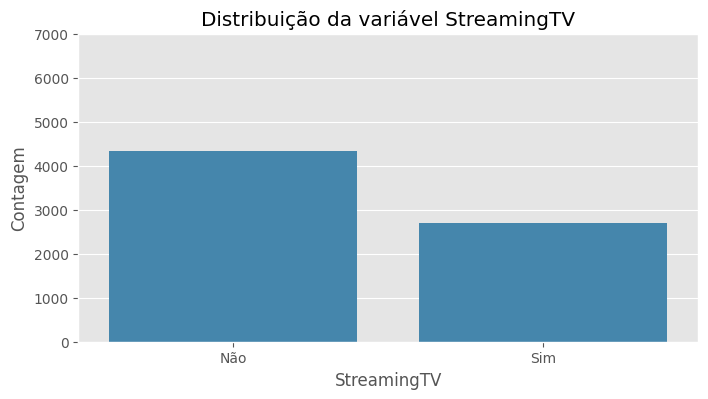


Análise univariada para: StreamingMovies
Frequência absoluta:
StreamingMovies
0    4301
1    2731
Name: count, dtype: int64
Frequência relativa (%):
StreamingMovies
0    61.16
1    38.84
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


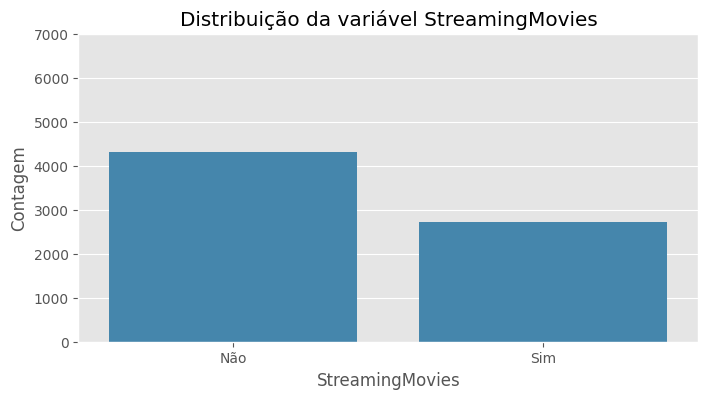


Análise univariada para: PaperlessBilling
Frequência absoluta:
PaperlessBilling
1    4168
0    2864
Name: count, dtype: int64
Frequência relativa (%):
PaperlessBilling
1    59.27
0    40.73
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


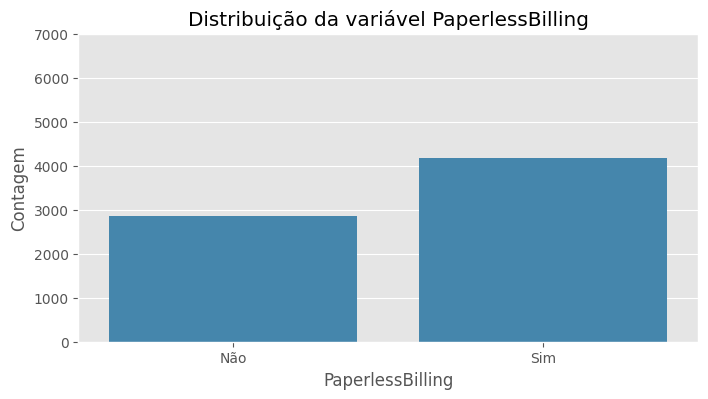


Análise univariada para: InternetService_DSL
Frequência absoluta:
InternetService_DSL
0    4616
1    2416
Name: count, dtype: int64
Frequência relativa (%):
InternetService_DSL
0    65.64
1    34.36
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


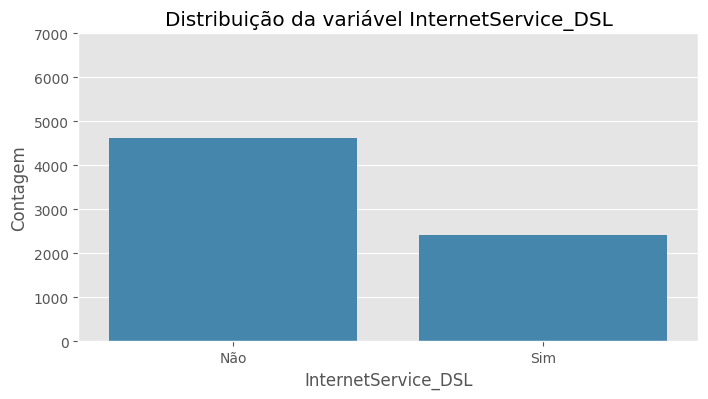


Análise univariada para: InternetService_Fiber optic
Frequência absoluta:
InternetService_Fiber optic
0    3936
1    3096
Name: count, dtype: int64
Frequência relativa (%):
InternetService_Fiber optic
0    55.97
1    44.03
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


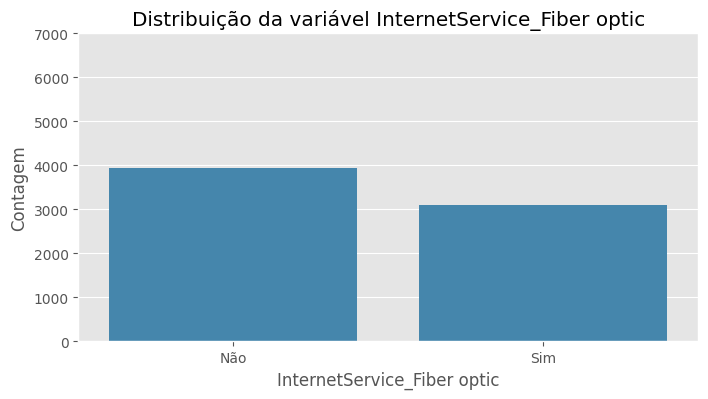


Análise univariada para: Contract_Month-to-month
Frequência absoluta:
Contract_Month-to-month
1    3875
0    3157
Name: count, dtype: int64
Frequência relativa (%):
Contract_Month-to-month
1    55.11
0    44.89
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


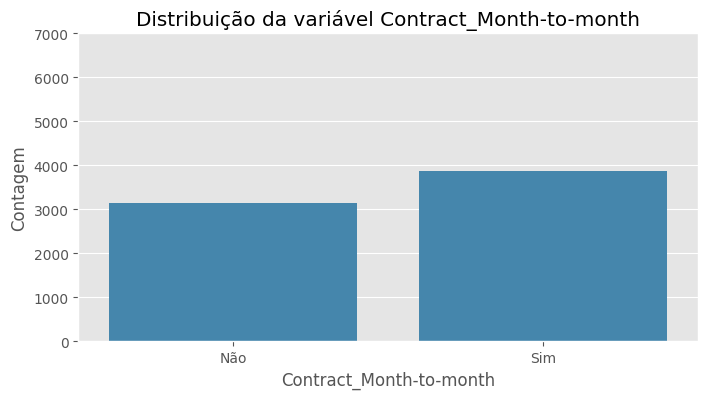


Análise univariada para: Contract_One year
Frequência absoluta:
Contract_One year
0    5560
1    1472
Name: count, dtype: int64
Frequência relativa (%):
Contract_One year
0    79.07
1    20.93
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


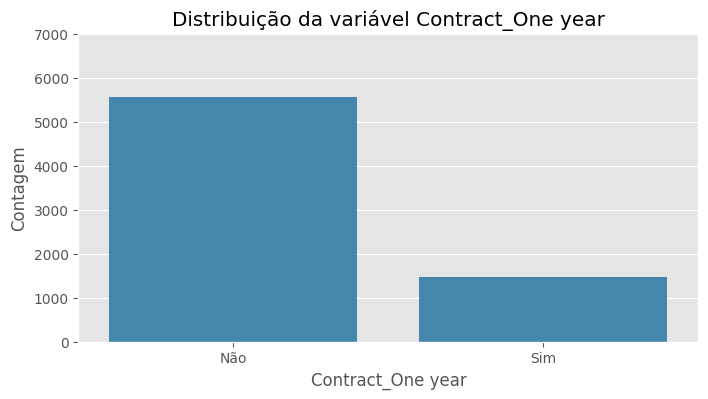


Análise univariada para: Contract_Two year
Frequência absoluta:
Contract_Two year
0    5347
1    1685
Name: count, dtype: int64
Frequência relativa (%):
Contract_Two year
0    76.04
1    23.96
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


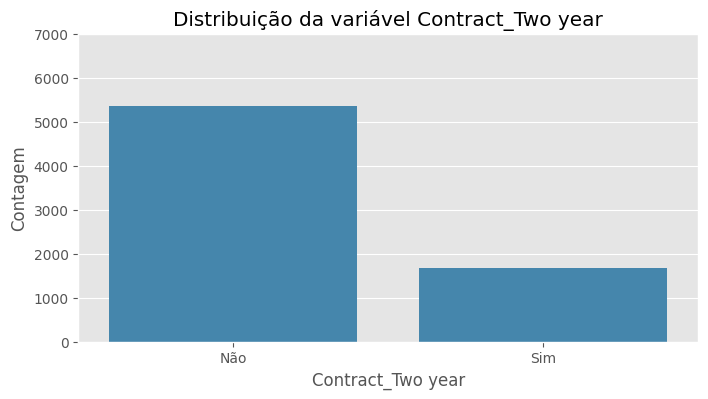


Análise univariada para: PaymentMethod_Bank transfer (automatic)
Frequência absoluta:
PaymentMethod_Bank transfer (automatic)
0    5490
1    1542
Name: count, dtype: int64
Frequência relativa (%):
PaymentMethod_Bank transfer (automatic)
0    78.07
1    21.93
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


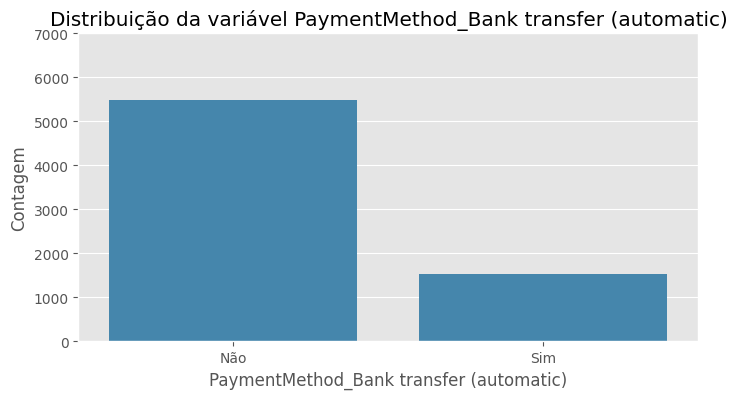


Análise univariada para: PaymentMethod_Credit card (automatic)
Frequência absoluta:
PaymentMethod_Credit card (automatic)
0    5511
1    1521
Name: count, dtype: int64
Frequência relativa (%):
PaymentMethod_Credit card (automatic)
0    78.37
1    21.63
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


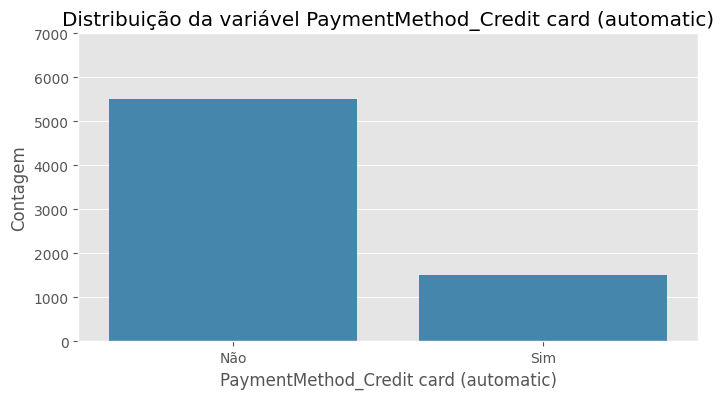


Análise univariada para: PaymentMethod_Electronic check
Frequência absoluta:
PaymentMethod_Electronic check
0    4667
1    2365
Name: count, dtype: int64
Frequência relativa (%):
PaymentMethod_Electronic check
0    66.37
1    33.63
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


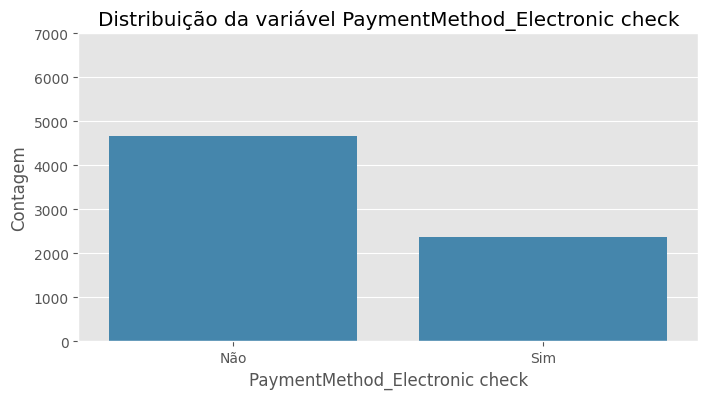


Análise univariada para: PaymentMethod_Mailed check
Frequência absoluta:
PaymentMethod_Mailed check
0    5428
1    1604
Name: count, dtype: int64
Frequência relativa (%):
PaymentMethod_Mailed check
0    77.19
1    22.81
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


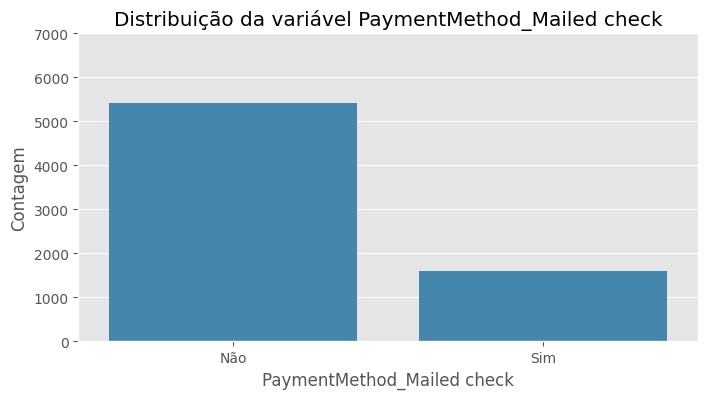


Análise univariada para: Churn
Frequência absoluta:
Churn
0    5163
1    1869
Name: count, dtype: int64
Frequência relativa (%):
Churn
0    73.42
1    26.58
Name: proportion, dtype: float64


<ipython-input-33-1365640368>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


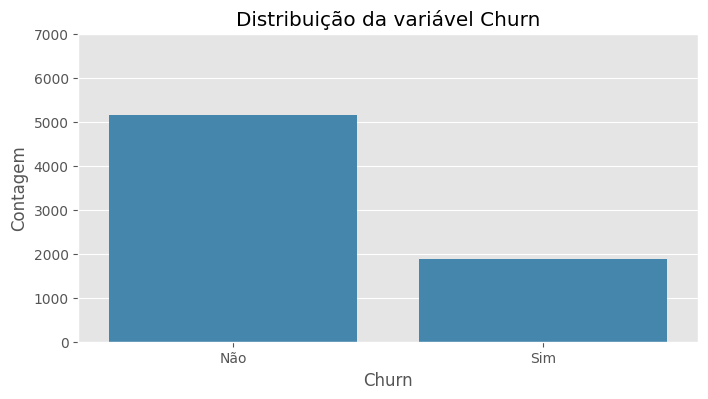

In [33]:
# Contagem de valores por categoria

exclude_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

cols_to_analyze = [col for col in data.columns if col not in exclude_cols]

for col in cols_to_analyze:
    print(f"\nAnálise univariada para: {col}")

    counts = data[col].value_counts()
    print("Frequência absoluta:")
    print(counts)

    percent = data[col].value_counts(normalize=True) * 100
    print("Frequência relativa (%):")
    print(percent.round(2))

    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=data)
    plt.ylim(0, 7000)
    plt.title(f'Distribuição da variável {col}')
    plt.ylabel('Contagem')

    ax = sns.countplot(x=col, data=data)
    if sorted(data[col].dropna().unique()) == [0, 1]:
        ax.set_xticklabels(['Não', 'Sim'])

    if col == 'gender':
        ax.set_xticklabels(['Homem', 'Mulher'])

    plt.show()


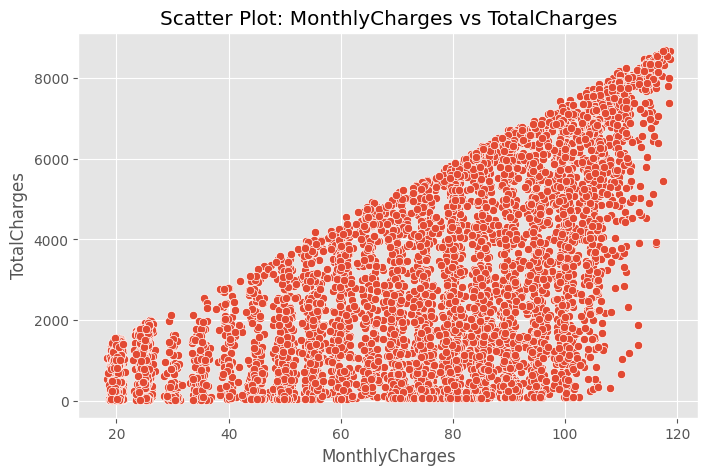

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges')
plt.title('Scatter Plot: MonthlyCharges vs TotalCharges')
plt.show()

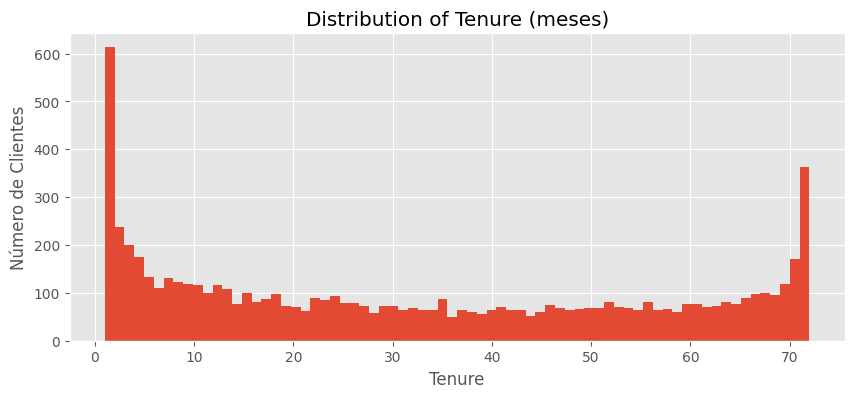

In [35]:
data['tenure'].hist(bins=72, figsize=(10, 4))
plt.title('Distribution of Tenure (meses)')
plt.xlabel('Tenure')
plt.ylabel('Número de Clientes')
plt.show()


 Análise de churn por faixas de: tenure
Churn          Churn = 0 (%)  Churn = 1 (%)
tenure                                     
(0.929, 15.2]          53.80          46.20
(15.2, 29.4]           75.16          24.84
(29.4, 43.6]           78.19          21.81
(43.6, 57.8]           85.01          14.99
(57.8, 72.0]           92.67           7.33


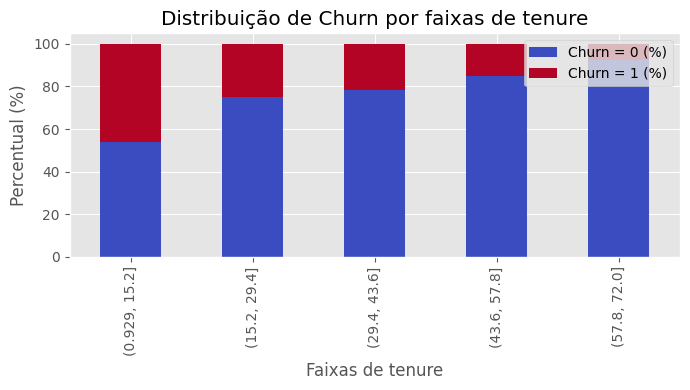


 Análise de churn por faixas de: MonthlyCharges
Churn            Churn = 0 (%)  Churn = 1 (%)
MonthlyCharges                               
(18.15, 38.35]           88.55          11.45
(38.35, 58.45]           72.98          27.02
(58.45, 78.55]           70.48          29.52
(78.55, 98.65]           63.01          36.99
(98.65, 118.75]          69.94          30.06


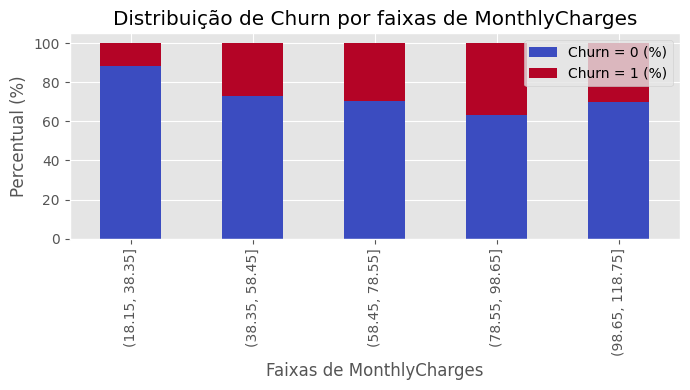


 Análise de churn por faixas de: TotalCharges
Churn             Churn = 0 (%)  Churn = 1 (%)
TotalCharges                                  
(10.134, 1752.0]          67.11          32.89
(1752.0, 3485.2]          75.32          24.68
(3485.2, 5218.4]          83.60          16.40
(5218.4, 6951.6]          85.25          14.75
(6951.6, 8684.8]          89.28          10.72


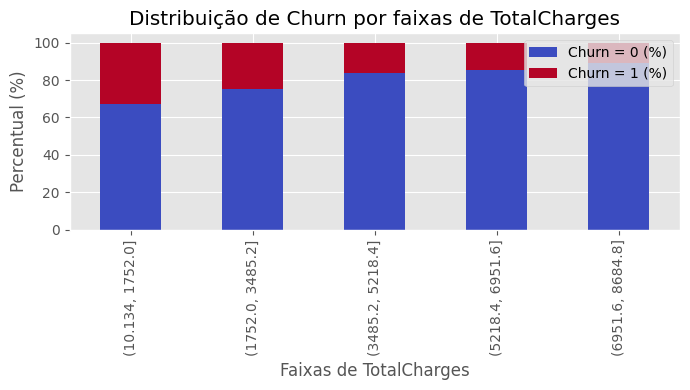

In [36]:
variaveis_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in variaveis_numericas:
    print(f"\n Análise de churn por faixas de: {col}")

    # Criar faixas (bins) sem salvar no DataFrame
    faixas = pd.cut(data[col], bins=5)

    # Tabela de porcentagem
    tab = pd.crosstab(faixas, data['Churn'], normalize='index') * 100
    tab = tab.rename(columns={0: 'Churn = 0 (%)', 1: 'Churn = 1 (%)'})
    print(tab.round(2))

    # Gráfico de barras empilhado
    tab.plot(kind='bar', stacked=True, figsize=(7, 4), colormap='coolwarm')
    plt.title(f'Distribuição de Churn por faixas de {col}')
    plt.ylabel('Percentual (%)')
    plt.xlabel(f'Faixas de {col}')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


 Análise de churn para: gender
Churn   Churn = 0 (%)  Churn = 1 (%)
gender                              
0               73.80          26.20
1               73.04          26.96


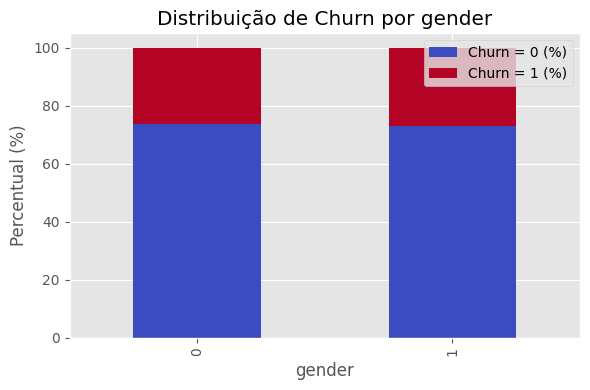


 Análise de churn para: SeniorCitizen
Churn          Churn = 0 (%)  Churn = 1 (%)
SeniorCitizen                              
0                      76.35          23.65
1                      58.32          41.68


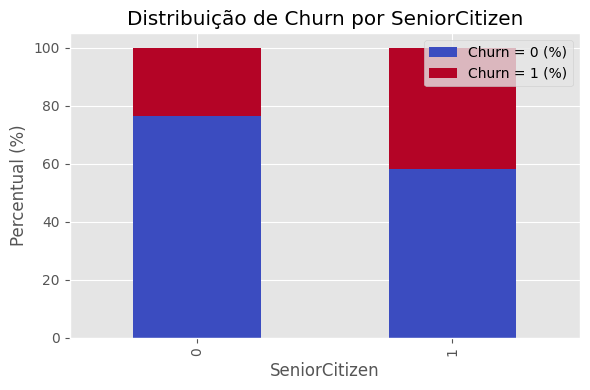


 Análise de churn para: Partner
Churn    Churn = 0 (%)  Churn = 1 (%)
Partner                              
0                67.02          32.98
1                80.28          19.72


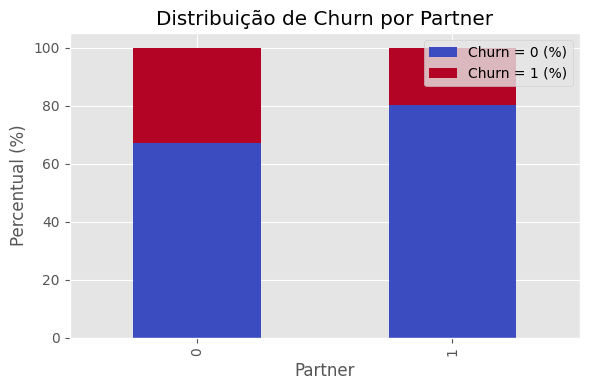


 Análise de churn para: Dependents
Churn       Churn = 0 (%)  Churn = 1 (%)
Dependents                              
0                   68.72          31.28
1                   84.47          15.53


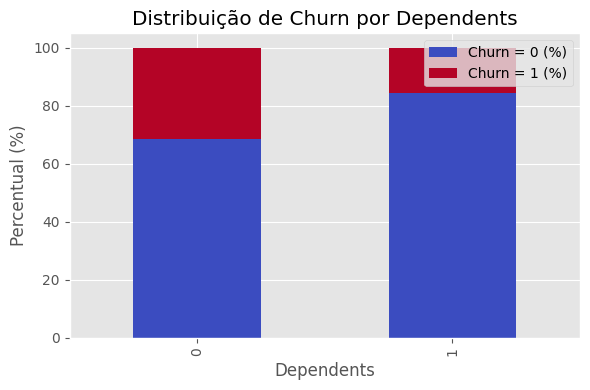


 Análise de churn para: PhoneService
Churn         Churn = 0 (%)  Churn = 1 (%)
PhoneService                              
0                     75.00          25.00
1                     73.25          26.75


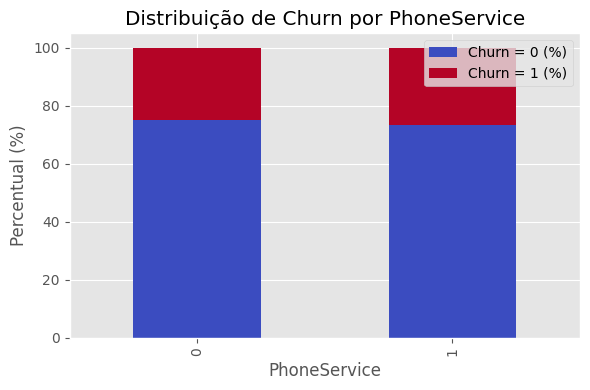


 Análise de churn para: MultipleLines
Churn          Churn = 0 (%)  Churn = 1 (%)
MultipleLines                              
0                      74.93          25.07
1                      71.35          28.65


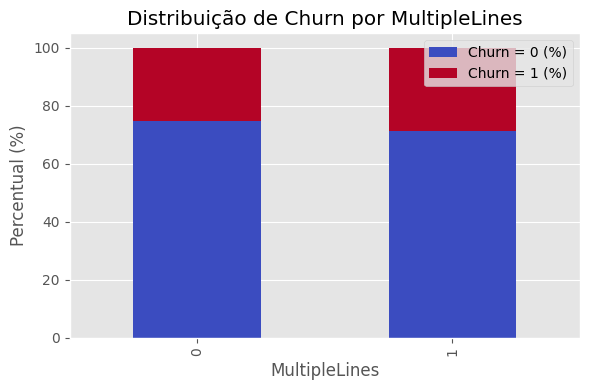


 Análise de churn para: OnlineSecurity
Churn           Churn = 0 (%)  Churn = 1 (%)
OnlineSecurity                              
0                       68.63          31.37
1                       85.36          14.64


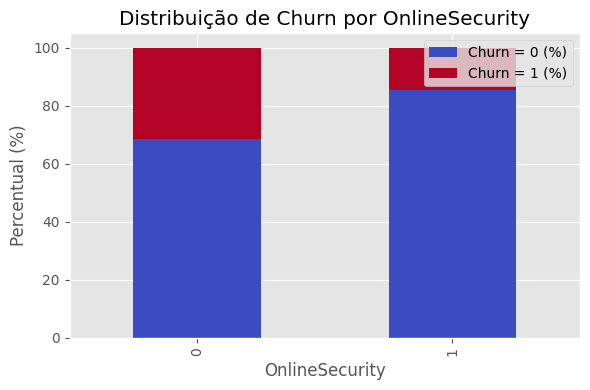


 Análise de churn para: OnlineBackup
Churn         Churn = 0 (%)  Churn = 1 (%)
OnlineBackup                              
0                     70.78          29.22
1                     78.43          21.57


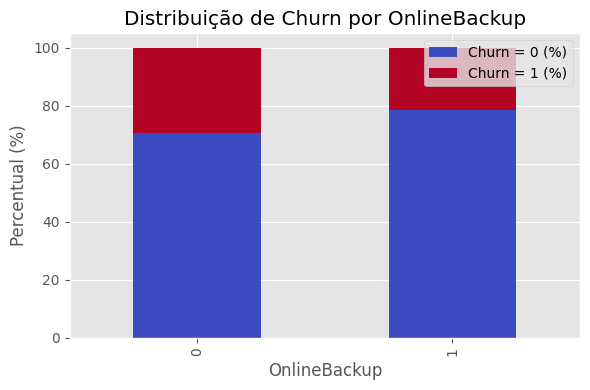


 Análise de churn para: DeviceProtection
Churn             Churn = 0 (%)  Churn = 1 (%)
DeviceProtection                              
0                         71.30          28.70
1                         77.46          22.54


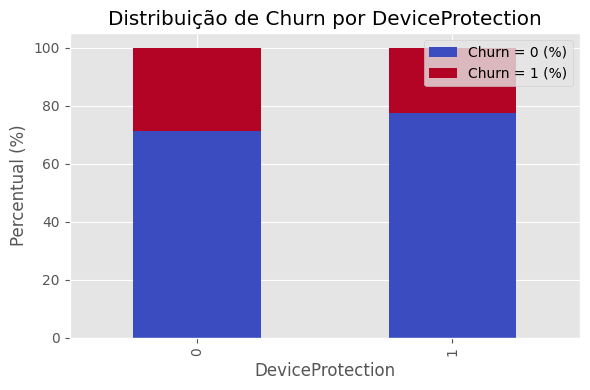


 Análise de churn para: TechSupport
Churn        Churn = 0 (%)  Churn = 1 (%)
TechSupport                              
0                    68.77          31.23
1                    84.80          15.20


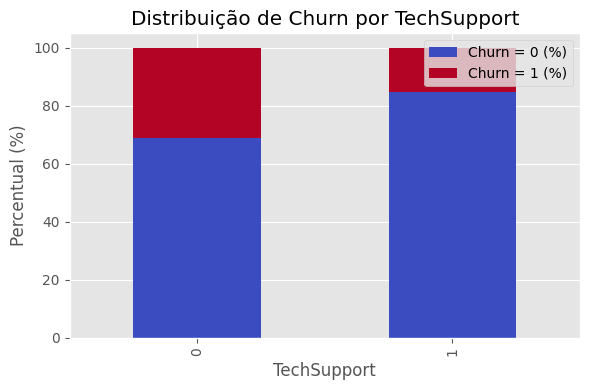


 Análise de churn para: StreamingTV
Churn        Churn = 0 (%)  Churn = 1 (%)
StreamingTV                              
0                    75.63          24.37
1                    69.89          30.11


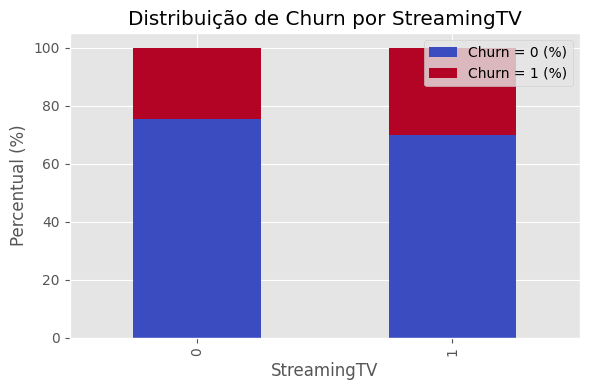


 Análise de churn para: StreamingMovies
Churn            Churn = 0 (%)  Churn = 1 (%)
StreamingMovies                              
0                        75.56          24.44
1                        70.05          29.95


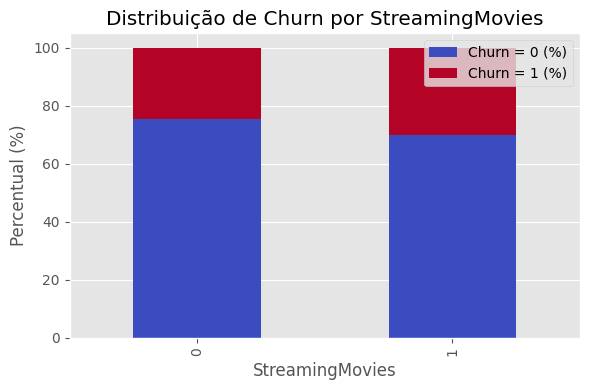


 Análise de churn para: PaperlessBilling
Churn             Churn = 0 (%)  Churn = 1 (%)
PaperlessBilling                              
0                         83.62          16.38
1                         66.41          33.59


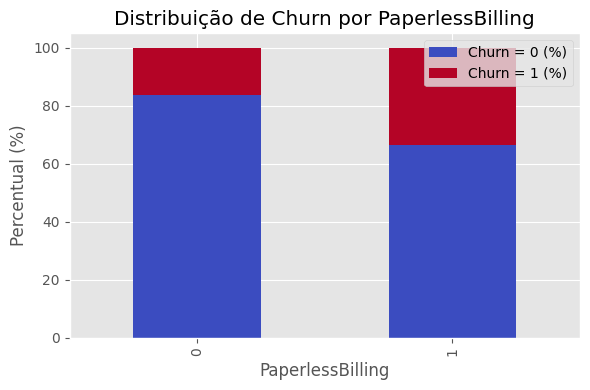


 Análise de churn para: InternetService_DSL
Churn                Churn = 0 (%)  Churn = 1 (%)
InternetService_DSL                              
0                            69.45          30.55
1                            81.00          19.00


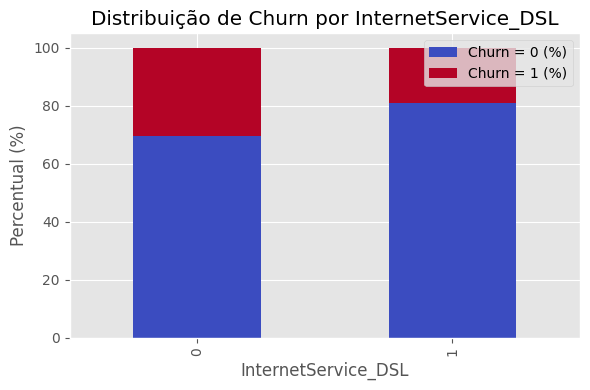


 Análise de churn para: InternetService_Fiber optic
Churn                        Churn = 0 (%)  Churn = 1 (%)
InternetService_Fiber optic                              
0                                    85.47          14.53
1                                    58.11          41.89


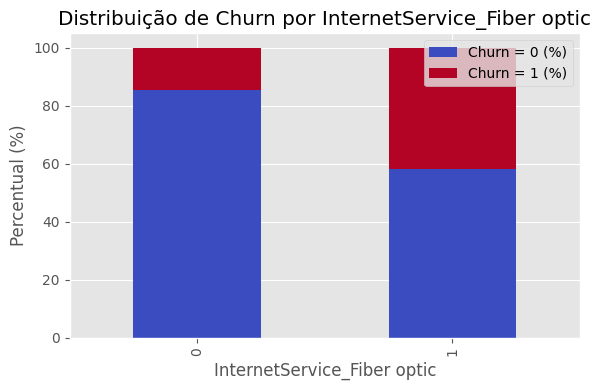


 Análise de churn para: Contract_Month-to-month
Churn                    Churn = 0 (%)  Churn = 1 (%)
Contract_Month-to-month                              
0                                93.22           6.78
1                                57.29          42.71


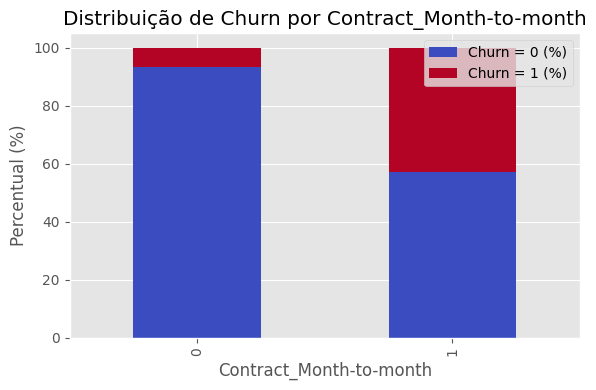


 Análise de churn para: Contract_One year
Churn              Churn = 0 (%)  Churn = 1 (%)
Contract_One year                              
0                          69.37          30.63
1                          88.72          11.28


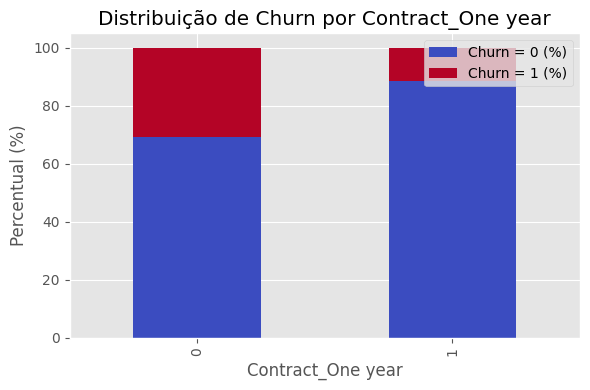


 Análise de churn para: Contract_Two year
Churn              Churn = 0 (%)  Churn = 1 (%)
Contract_Two year                              
0                          65.94          34.06
1                          97.15           2.85


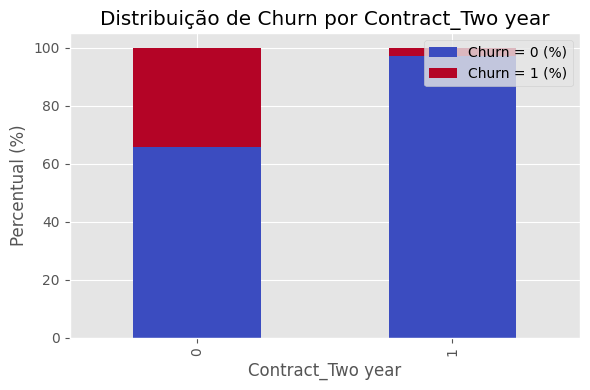


 Análise de churn para: PaymentMethod_Bank transfer (automatic)
Churn                                    Churn = 0 (%)  Churn = 1 (%)
PaymentMethod_Bank transfer (automatic)                              
0                                                70.66          29.34
1                                                83.27          16.73


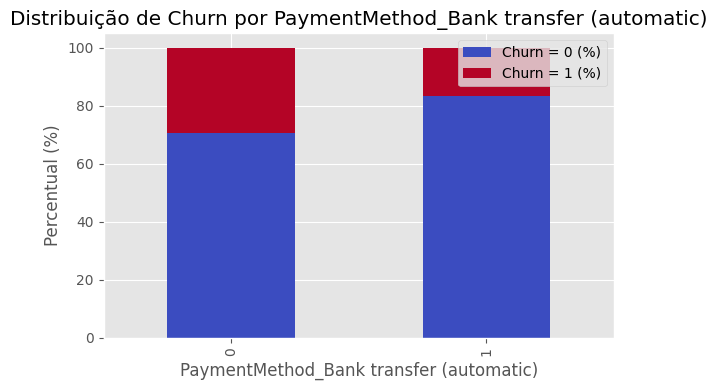


 Análise de churn para: PaymentMethod_Credit card (automatic)
Churn                                  Churn = 0 (%)  Churn = 1 (%)
PaymentMethod_Credit card (automatic)                              
0                                              70.30          29.70
1                                              84.75          15.25


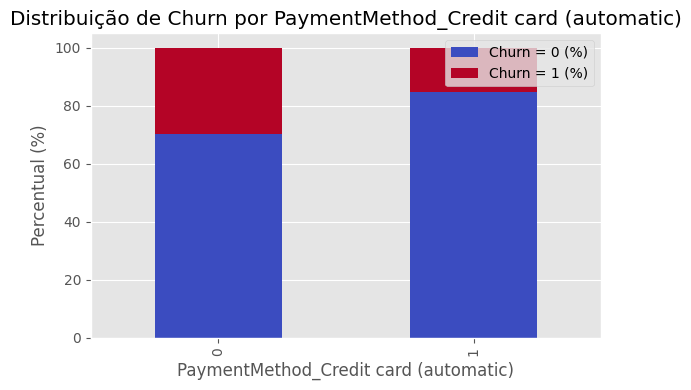


 Análise de churn para: PaymentMethod_Electronic check
Churn                           Churn = 0 (%)  Churn = 1 (%)
PaymentMethod_Electronic check                              
0                                       82.90          17.10
1                                       54.71          45.29


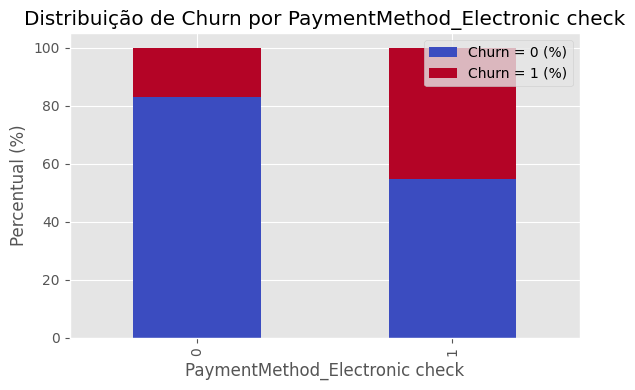


 Análise de churn para: PaymentMethod_Mailed check
Churn                       Churn = 0 (%)  Churn = 1 (%)
PaymentMethod_Mailed check                              
0                                   71.24          28.76
1                                   80.80          19.20


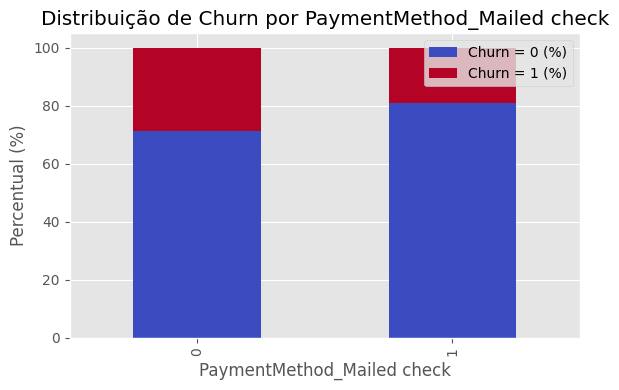

In [37]:
# Variáveis que não queremos analisar
colunas_excluidas = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Variáveis categóricas (resto)
variaveis_categoricas = [col for col in data.columns if col not in colunas_excluidas and data[col].nunique() < 10]

# Para cada variável categórica, mostrar distribuição de churn
for col in variaveis_categoricas:
    print(f"\n Análise de churn para: {col}")

    # Tabela de porcentagens
    tab = pd.crosstab(data[col], data['Churn'], normalize='index') * 100
    tab = tab.rename(columns={0: 'Churn = 0 (%)', 1: 'Churn = 1 (%)'})
    print(tab.round(2))

    # Gráfico de barras empilhadas
    tab.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')
    plt.title(f'Distribuição de Churn por {col}')
    plt.ylabel('Percentual (%)')
    plt.xlabel(col)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


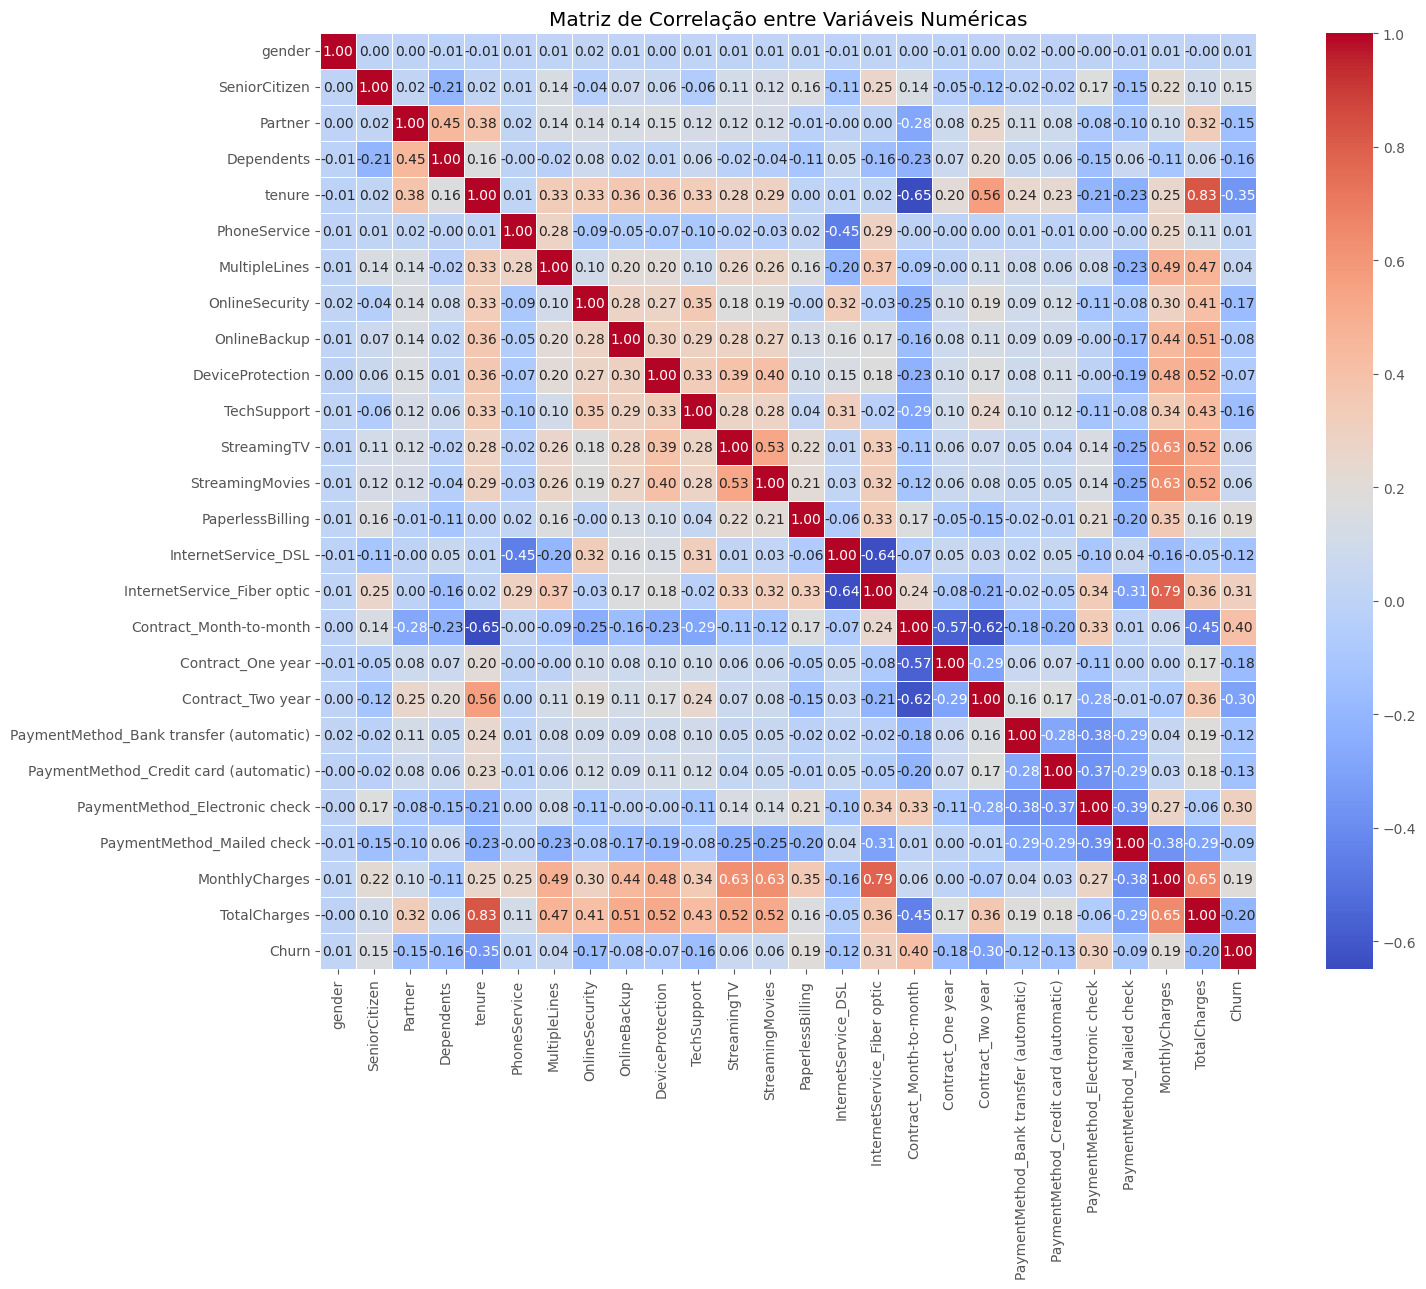

In [38]:
# Selecionar apenas variáveis numéricas
variaveis_numericas = data.select_dtypes(include=['int64', 'float64'])

# Calcular correlação
correlacao = variaveis_numericas.corr()

# Exibir como heatmap
plt.figure(figsize=(17, 13))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square= True)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()


#TREINAMENTO:

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                           

###Normalização com separação de treino e teste:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [41]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
colunas_para_normalizar = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

X_train[colunas_para_normalizar] = scaler.fit_transform(X_train[colunas_para_normalizar])
X_test[colunas_para_normalizar] = scaler.transform(X_test[colunas_para_normalizar])

##Treinamento com diferentes modelos:

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



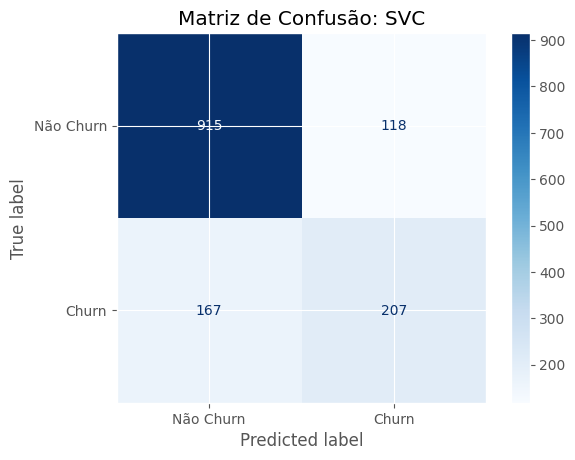

None


In [43]:
from sklearn.svm import SVC

def matriz_de_confusao(y_pred, y_test, model: str):
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn'])
  disp.plot(cmap=plt.cm.Blues)
  plt.title("Matriz de Confusão: "+ str(model))
  plt.show()


svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print(matriz_de_confusao(y_pred, y_test, "SVC"))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



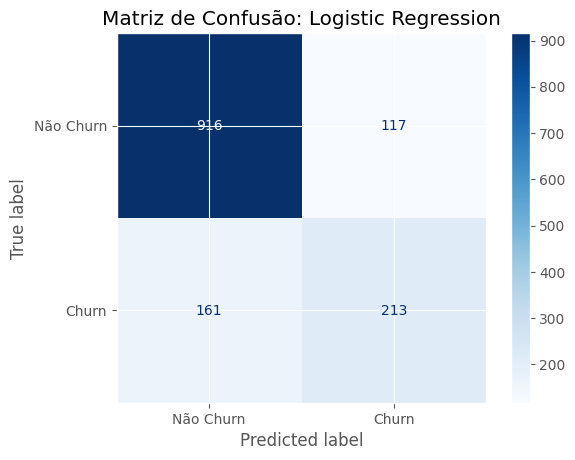

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
matriz_de_confusao(y_pred, y_test, "Logistic Regression")

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



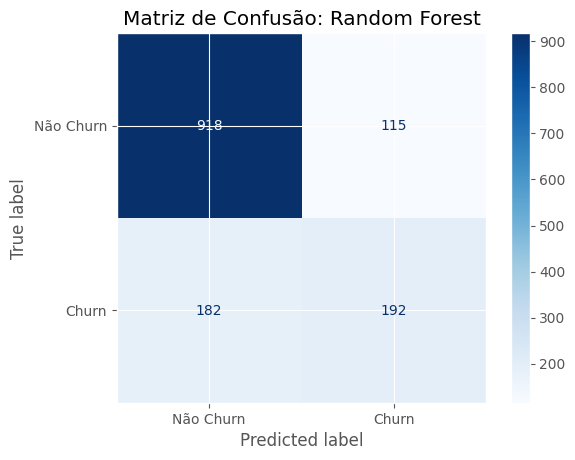

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

matriz_de_confusao(y_pred, y_test, "Random Forest")

Foi notado que os modelos tendem a aprender mais a classe majoritária. Assim, a fim de melhorar a acurácia dos modelos, testamos métodos de balanceamento entre classes.

##Oversampling:

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1033
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407



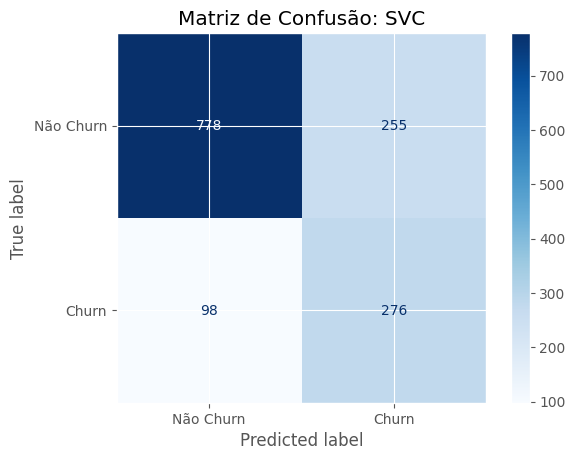

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

svc.fit(X_train_smote, y_train_smote)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
matriz_de_confusao(y_pred, y_test, "SVC")

In [47]:
X_train_smote.shape

(8260, 25)

In [48]:
X_train.shape

(5625, 25)

In [49]:
print("Treinamento original - classe 0:", sum(y_train==0))
print("Treinamento original - classe 1:", sum(y_train==1))
print("Após SMOTE - classe 0:", sum(y_train_smote==0))
print("Após SMOTE - classe 1:", sum(y_train_smote==1))

Treinamento original - classe 0: 4130
Treinamento original - classe 1: 1495
Após SMOTE - classe 0: 4130
Após SMOTE - classe 1: 4130


              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.75      0.76      1407



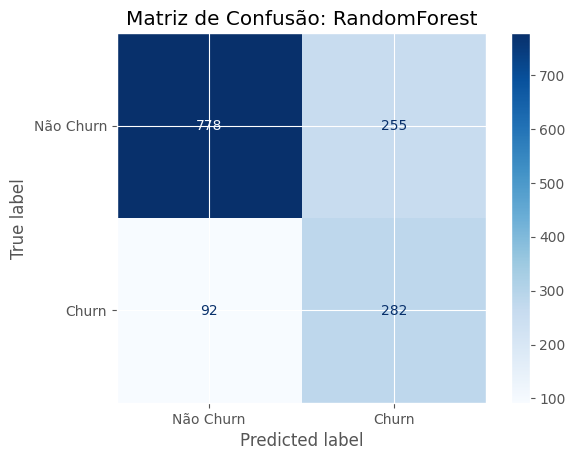

In [50]:
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
matriz_de_confusao(y_pred, y_test, "RandomForest")

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.74      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.74      0.75      1407



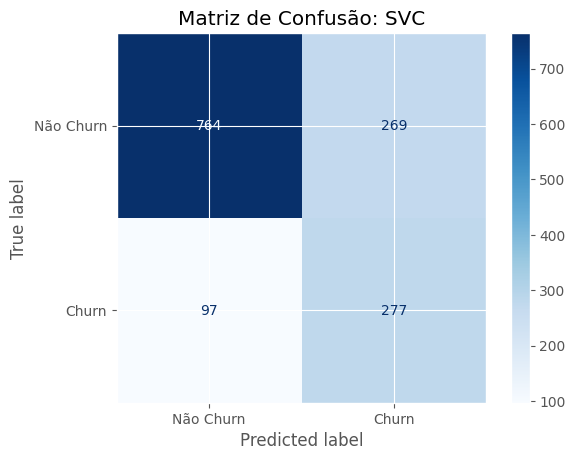

In [52]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

svc.fit(X_train_adasyn, y_train_adasyn)

y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
matriz_de_confusao(y_pred, y_test, "SVC")


In [53]:
print("Treinamento original - classe 0:", sum(y_train==0))
print("Treinamento original - classe 1:", sum(y_train==1))
print("Após ADASYN - classe 0:", sum(y_train_adasyn==0))
print("Após ADASYN - classe 1:", sum(y_train_adasyn==1))

Treinamento original - classe 0: 4130
Treinamento original - classe 1: 1495
Após ADASYN - classe 0: 4130
Após ADASYN - classe 1: 4132


##Undersampling:



              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1033
           1       0.45      0.82      0.58       374

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.78      0.69      0.70      1407



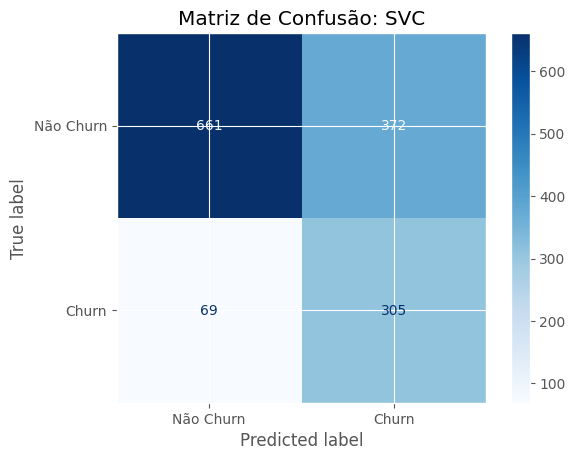

In [54]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

svc.fit(X_train_rus, y_train_rus)

y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
matriz_de_confusao(y_pred, y_test, "SVC")

In [55]:
print("Treinamento original - classe 0:", sum(y_train==0))
print("Treinamento original - classe 1:", sum(y_train==1))
print("Após RUS - classe 0:", sum(y_train_rus==0))
print("Após RUS - classe 1:", sum(y_train_rus==1))

Treinamento original - classe 0: 4130
Treinamento original - classe 1: 1495
Após RUS - classe 0: 1495
Após RUS - classe 1: 1495


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1033
           1       0.61      0.63      0.62       374

    accuracy                           0.79      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.80      0.79      0.79      1407



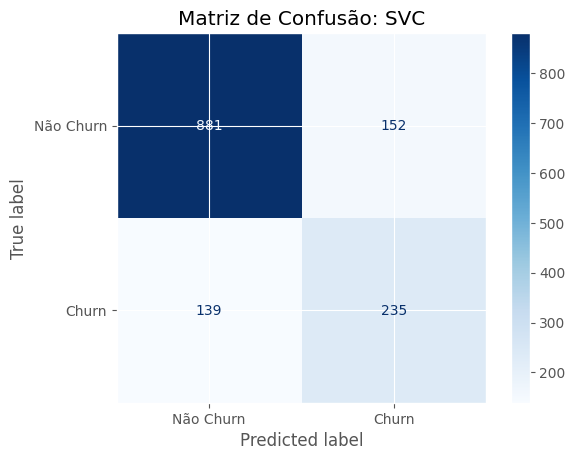

In [56]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

svc.fit(X_train_tl, y_train_tl)

y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
matriz_de_confusao(y_pred, y_test, "SVC")

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1033
           1       0.60      0.63      0.62       374

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.74      1407
weighted avg       0.79      0.79      0.79      1407



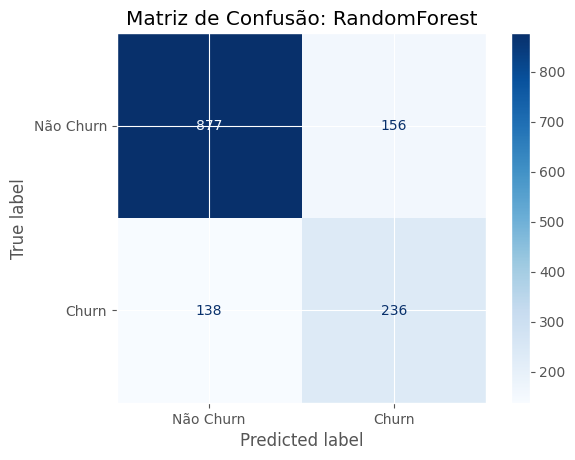

In [57]:
rf.fit(X_train_tl, y_train_tl)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
matriz_de_confusao(y_pred, y_test, "RandomForest")

In [58]:
print("Treinamento original - classe 0:", sum(y_train==0))
print("Treinamento original - classe 1:", sum(y_train==1))
print("Após TomekLinks - classe 0:", sum(y_train_tl==0))
print("Após TomekLinks - classe 1:", sum(y_train_tl==1))

Treinamento original - classe 0: 4130
Treinamento original - classe 1: 1495
Após TomekLinks - classe 0: 3738
Após TomekLinks - classe 1: 1495
